In [1]:
import os

import numpy as np
import umap
from embeddings import TextEmbedder
from google.cloud import aiplatform
from icecream import ic
from llama_index.core.node_parser import MarkdownNodeParser
from llama_parse import LlamaParse
from rich.pretty import pprint as pp
from utils import (Visual, get_credential, get_key_filepath,
                   get_trainer_script_filepath)

import nest_asyncio; nest_asyncio.apply()

2024-07-22 20:20:17.089398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 20:20:17.288203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 20:20:17.291485: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 20:20:17.654591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 20:20:19.674444: W tensorflow/com

In [2]:
!wget -O tmp/Baidu-Inc-Code-of-Business-Conduct-and-Ethics.pdf "https://dl.dropbox.com/scl/fi/boxb3mvc0mv7d7tndmy0j/BAIDU-INC.-CODE-OF-BUSINESS-CONDUCT-AND-ETHICS.pdf?rlkey=gs378jtvi6gwzy0ncn0jx0876"

tmp/Baidu-Inc-Code-of-Business-Conduct-and-Ethics.pdf: No such file or directory


In [3]:
this_notebook_dir = os.path.abspath('')
ic(this_notebook_dir)

ic| /tmp/ipykernel_5675/2203143780.py:2 in <module>
    this_notebook_dir: '/teamspace/studios/this_studio'


'/teamspace/studios/this_studio'

In [4]:
filepath = os.path.join(this_notebook_dir, "gcp-ml-trainer", 'tmp/Baidu-Inc-Code-of-Business-Conduct-and-Ethics.pdf')
api_key =  os.getenv("LLAMA_CLOUD_API_KEY")

parser = LlamaParse( 
    api_key=api_key,
    result_type="markdown"
)
markdown_docs = parser.load_data(filepath)
pp(markdown_docs)

Started parsing the file under job_id c8f94e17-8b49-45fd-87c8-331bcdee0888


[
│   Document(
│   │   id_='6d80c23d-dde1-4e08-9973-ecce2e0ee5db',
│   │   embedding=None,
│   │   metadata={},
│   │   excluded_embed_metadata_keys=[],
│   │   excluded_llm_metadata_keys=[],
│   │   relationships={},
│   │   text='# BAIDU, INC. CODE OF BUSINESS CONDUCT AND ETHICS\n\n# 1. Summary\n\nThis Code of Business Conduct and Ethics (the "Code") applies to all of the employees, officers, advisors and directors of Baidu.com, Inc., a company incorporated in the Cayman Islands, its subsidiaries and/or affiliated entities (collectively, the "Company"), whether such person works for the Company on a full-time, part-time, consultative, or temporary basis (each, an "Employee" and collectively, the "Employees").\n\nThis Code contains general guidelines for conducting the business of the Company consistent with the highest standards of business ethics, and is intended to qualify as a "code of ethics" within the meaning of Section 406 of the Sarbanes-Oxley Act of 2002 and the rules promulgated thereunder. To the extent this Code requires higher standards than those required by commercial practice or applicable laws, rules or regulations, the Company adheres to these higher standards.\n\n# 2. Guidelines\n\nThis Code is designed to deter wrongdoing and to promote:\n\n- compliance with applicable governmental laws, rules and regulations;\n- honest and ethical conduct, including the ethical handling of actual or apparent conflicts of interest between personal and professional relationships; and\n- full, fair, accurate and timely disclosure in reports and documents that the Company will file with, or submit to, the U.S. Securities and Exchange Commission (the "SEC") and in other public communications made by the Company.\n\nThis Code shall be implemented at all levels of hierarchy of the Company. All Employees are responsible for being aware of, adhering to and ensuring that others abide by the Code.\n\n# 3. Applicable Laws, Regulations and Policies\n\nEach Employee has an obligation to comply with the laws of the cities, provinces, regions and countries in which the Company operates. This includes, without limitation, laws covering securities, labor, employment, commercial bribery and kickbacks, copyrights, trademarks and trade secrets, information privacy, insider trading, offering or receiving gratuities, employment harassment, occupational health and safety, false or misleading financial information or misuse of corporate assets. Employees are expected to understand and comply with all laws, rules and regulations that apply to their respective positions at the Company.\n\nEach Employee shall immediately report to the Company in accordance with the Baidu Professional Ethics Regulations on Work Management Reporting as stipulated in Section 10 of this Code, any violations of the applicable laws and regulations as well as of any provisions of the Code.\n\nIf any doubt exists about whether a course of action is lawful or in compliance with the Company\'s policies, the Employee should seek advice immediately from his/her departmental.\n---\n# Employment Practices\n\n|4.1 Observing Applicable Employment Laws and Agreements|The Company observes fair employment practices in every aspect of its business. The Employees must comply with all applicable labor and employment laws and employment agreements entered into between the Company and Employees. If there is any conflict between the applicable law and this Code, the applicable law prevails.|\n|---|---|\n|4.2 Working Environment|The Company is dedicated to creating a high-quality working environment under which Employees respect and trust each other such that each Employee acts in an honest, friendly and proactive way with a responsible attitude and high moral standard.|\n\n# Harassment Prevention\n\nThe Company prohibits harassment in any form, whether physical or verbal and whether committed by supervisors, non-supervisory personnel or non-Employees. Harassment may include, but is not li

In [5]:
parser = MarkdownNodeParser()
nodes = parser.get_nodes_from_documents(markdown_docs)
pp(nodes[:3])

[
│   TextNode(
│   │   id_='a4ff7c6f-8e1d-4bb3-89c8-db0b6d8798cd',
│   │   embedding=None,
│   │   metadata={'Header_1': 'BAIDU, INC. CODE OF BUSINESS CONDUCT AND ETHICS'},
│   │   excluded_embed_metadata_keys=[],
│   │   excluded_llm_metadata_keys=[],
│   │   relationships={
│   │   │   <NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(
│   │   │   │   node_id='6d80c23d-dde1-4e08-9973-ecce2e0ee5db',
│   │   │   │   node_type=<ObjectType.DOCUMENT: '4'>,
│   │   │   │   metadata={},
│   │   │   │   hash='ec8ab4253c24ab9336ca7698f9a621033047db35f3a83529c538b448d3e50ae2'
│   │   │   ),
│   │   │   <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(
│   │   │   │   node_id='f6390c2c-4480-4cbf-acf8-f37d916831d6',
│   │   │   │   node_type=<ObjectType.TEXT: '1'>,
│   │   │   │   metadata={'Header_1': '1. Summary'},
│   │   │   │   hash='4124a7126c2e69f4d1c3695b7460f954ae85eeb2f9ef18993a45a7db50caf526'
│   │   │   )
│   │   },
│   │   text='BAIDU, INC. CODE OF BUSINESS CONDUCT AND ETHICS',
│   │   start_char_idx=2,
│   │   end_char_idx=49,
│   │   text_template='{metadata_str}\n\n{content}',
│   │   metadata_template='{key}: {value}',
│   │   metadata_seperator='\n'
│   ),
│   TextNode(
│   │   id_='f6390c2c-4480-4cbf-acf8-f37d916831d6',
│   │   embedding=None,
│   │   metadata={'Header_1': '1. Summary'},
│   │   excluded_embed_metadata_keys=[],
│   │   excluded_llm_metadata_keys=[],
│   │   relationships={
│   │   │   <NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(
│   │   │   │   node_id='6d80c23d-dde1-4e08-9973-ecce2e0ee5db',
│   │   │   │   node_type=<ObjectType.DOCUMENT: '4'>,
│   │   │   │   metadata={},
│   │   │   │   hash='ec8ab4253c24ab9336ca7698f9a621033047db35f3a83529c538b448d3e50ae2'
│   │   │   ),
│   │   │   <NodeRelationship.PREVIOUS: '2'>: RelatedNodeInfo(
│   │   │   │   node_id='a4ff7c6f-8e1d-4bb3-89c8-db0b6d8798cd',
│   │   │   │   node_type=<ObjectType.TEXT: '1'>,
│   │   │   │   metadata={'Header_1': 'BAIDU, INC. CODE OF BUSINESS CONDUCT AND ETHICS'},
│   │   │   │   hash='f0f7051be9ca1705b4679dd2bc8313a6c78762c1b113654d3f6f1494c14c646c'
│   │   │   ),
│   │   │   <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(
│   │   │   │   node_id='5fdfd0bc-8fc1-46e9-b8d7-68d89f544b9a',
│   │   │   │   node_type=<ObjectType.TEXT: '1'>,
│   │   │   │   metadata={'Header_1': '2. Guidelines'},
│   │   │   │   hash='ace971c507734e256195846f961809f9d6a99717542a49ac322fa13b29292c66'
│   │   │   )
│   │   },
│   │   text='1. Summary\n\nThis Code of Business Conduct and Ethics (the "Code") applies to all of the employees, officers, advisors and directors of Baidu.com, Inc., a company incorporated in the Cayman Islands, its subsidiaries and/or affiliated entities (collectively, the "Company"), whether such person works for the Company on a full-time, part-time, consultative, or temporary basis (each, an "Employee" and collectively, the "Employees").\n\nThis Code contains general guidelines for conducting the business of the Company consistent with the highest standards of business ethics, and is intended to qualify as a "code of ethics" within the meaning of Section 406 of the Sarbanes-Oxley Act of 2002 and the rules promulgated thereunder. To the extent this Code requires higher standards than those required by commercial practice or applicable laws, rules or regulations, the Company adheres to these higher standards.',
│   │   start_char_idx=53,
│   │   end_char_idx=961,
│   │   text_template='{metadata_str}\n\n{content}',
│   │   metadata_template='{key}: {value}',
│   │   metadata_seperator='\n'
│   ),
│   TextNode(
│   │   id_='5fdfd0bc-8fc1-46e9-b8d7-68d89f544b9a',
│   │   embedding=None,
│   │   metadata={'Header_1': '2. Guidelines'},
│   │   excluded_embed_metadata_keys=[],
│   │   excluded_llm_metadata_keys=[],
│   │   relationships={
│   │   │   <NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(
│   │   │   │   node_id='6d80c23d-dde1-4e08-9973-ecce2e0ee5db',
│   │   │   │   node_type=<ObjectType.DOCUMENT: '4'>,
│   │   │   │   meta

In [6]:
text_docs = [node.text for node in nodes]
pp(text_docs)

[
│   'BAIDU, INC. CODE OF BUSINESS CONDUCT AND ETHICS',
│   '1. Summary\n\nThis Code of Business Conduct and Ethics (the "Code") applies to all of the employees, officers, advisors and directors of Baidu.com, Inc., a company incorporated in the Cayman Islands, its subsidiaries and/or affiliated entities (collectively, the "Company"), whether such person works for the Company on a full-time, part-time, consultative, or temporary basis (each, an "Employee" and collectively, the "Employees").\n\nThis Code contains general guidelines for conducting the business of the Company consistent with the highest standards of business ethics, and is intended to qualify as a "code of ethics" within the meaning of Section 406 of the Sarbanes-Oxley Act of 2002 and the rules promulgated thereunder. To the extent this Code requires higher standards than those required by commercial practice or applicable laws, rules or regulations, the Company adheres to these higher standards.',
│   '2. Guidelines\n\nThis Code is designed to deter wrongdoing and to promote:\n\n- compliance with applicable governmental laws, rules and regulations;\n- honest and ethical conduct, including the ethical handling of actual or apparent conflicts of interest between personal and professional relationships; and\n- full, fair, accurate and timely disclosure in reports and documents that the Company will file with, or submit to, the U.S. Securities and Exchange Commission (the "SEC") and in other public communications made by the Company.\n\nThis Code shall be implemented at all levels of hierarchy of the Company. All Employees are responsible for being aware of, adhering to and ensuring that others abide by the Code.',
│   "3. Applicable Laws, Regulations and Policies\n\nEach Employee has an obligation to comply with the laws of the cities, provinces, regions and countries in which the Company operates. This includes, without limitation, laws covering securities, labor, employment, commercial bribery and kickbacks, copyrights, trademarks and trade secrets, information privacy, insider trading, offering or receiving gratuities, employment harassment, occupational health and safety, false or misleading financial information or misuse of corporate assets. Employees are expected to understand and comply with all laws, rules and regulations that apply to their respective positions at the Company.\n\nEach Employee shall immediately report to the Company in accordance with the Baidu Professional Ethics Regulations on Work Management Reporting as stipulated in Section 10 of this Code, any violations of the applicable laws and regulations as well as of any provisions of the Code.\n\nIf any doubt exists about whether a course of action is lawful or in compliance with the Company's policies, the Employee should seek advice immediately from his/her departmental.\n---",
│   'Employment Practices\n\n|4.1 Observing Applicable Employment Laws and Agreements|The Company observes fair employment practices in every aspect of its business. The Employees must comply with all applicable labor and employment laws and employment agreements entered into between the Company and Employees. If there is any conflict between the applicable law and this Code, the applicable law prevails.|\n|---|---|\n|4.2 Working Environment|The Company is dedicated to creating a high-quality working environment under which Employees respect and trust each other such that each Employee acts in an honest, friendly and proactive way with a responsible attitude and high moral standard.|',
│   'Harassment Prevention\n\nThe Company prohibits harassment in any form, whether physical or verbal and whether committed by supervisors, non-supervisory personnel or non-Employees. Harassment may include, but is not limited to, offensive sexual flirtations, unwanted sexual advances or propositions, verbal abuse, sexually or racially degrading words, or the display in the workplace of sexually suggestive objects or pictures.',
│   '

In [7]:
key_filepath = None
project_id = "pioneering-flow-199508"
location = None

credentials = get_credential(get_key_filepath(key_filepath))
ic(f"Credentials: {credentials}")

aiplatform.init(project=project_id, credentials=credentials)
ic("Initialized AI Platform")

ic| /tmp/ipykernel_5675/1767530935.py:6 in <module>
    f"Credentials: {credentials}": ('Credentials: <google.oauth2.service_account.Credentials object at '
                                    '0x7fd506bd3d60>')
ic| /tmp/ipykernel_5675/1767530935.py:9 in <module>
    "Initialized AI Platform": 'Initialized AI Platform'


'Initialized AI Platform'

In [8]:
embedder = TextEmbedder("textembedding-gecko@001")

ic("Embedding texts in batches")
embeddings_list_np = embedder.embed_texts_in_batches(text_docs)
pp(f"Embeddings list_np: {embeddings_list_np}")
ic(f"shape: {embeddings_list_np.shape}")

embedder.release()

ic| /tmp/ipykernel_5675/4208161852.py:3 in <module>
    "Embedding texts in batches": 'Embedding texts in batches'


  0%|          | 0/8 [00:00<?, ?it/s]

'Embeddings list_np: [[ 0.03485064 -0.04114348 -0.01690804 ... -0.03136493 -0.0325182\n  -0.01547755]\n [ 0.01158775 -0.06076575 -0.01708969 ... -0.02091796 -0.04829009\n  -0.02901305]\n [-0.00470767 -0.0372651  -0.0066873  ... -0.03971847 -0.01705146\n  -0.04265401]\n ...\n [ 0.00956969 -0.0323787  -0.03348212 ... -0.01979918 -0.02969803\n  -0.02126452]\n [ 0.02098531 -0.03985582 -0.02023109 ... -0.00697783 -0.02917852\n  -0.00563186]\n [ 0.02253283 -0.03092949 -0.01095698 ... -0.00130463 -0.07636157\n  -0.01159309]]'

ic| /tmp/ipykernel_5675/4208161852.py:6 in <module>
    f"shape: {embeddings_list_np.shape}": 'shape: (36, 768)'


In [9]:
decompose = umap.UMAP(n_components=2)
decomposed = decompose.fit_transform(embeddings_list_np)

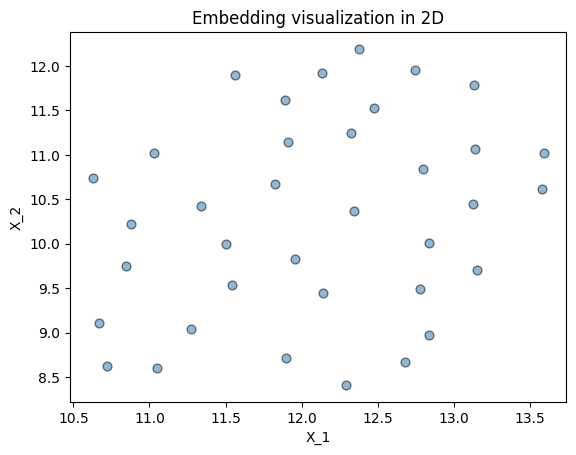

In [10]:
Visual.plot_2D(value_list_np=decomposed, label_list=text_docs, title="Embedding visualization in 2D")

/teamspace/studios/this_studio/gcp-ml-trainer/utils.py:73: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/teamspace/studios/this_studio/gcp-ml-trainer/utils.py:73: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


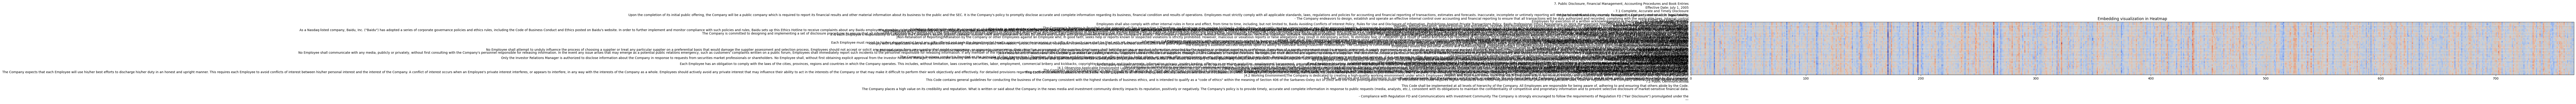

In [11]:
Visual.plot_heatmap(data=embeddings_list_np, y_label_list=text_docs, title="Embedding visualization in Heatmap")

In [12]:
import functools

from sklearn.cluster import DBSCAN, MeanShift


def fit_DBSCAN(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    dbscan_pred = dbscan.fit_predict(data)
    return dbscan_pred


def fit_MeanShift(data, bandwidth) -> MeanShift:
    meanshift = MeanShift(bandwidth=bandwidth, n_jobs=-1)
    meanshift.fit_predict(data)

    return meanshift.labels_

def apply_clustering(clustering_fn):
    preds = clustering_fn()
    centroid_ids = preds.astype(np.uint8)
    return centroid_ids

In [13]:
partial_fit_DBSCAN = functools.partial(
    fit_DBSCAN, data=embeddings_list_np, eps=5.0, min_samples=5
)

partial_fit_MeanShift = functools.partial(
    fit_MeanShift, data=embeddings_list_np, bandwidth=3.0
)

In [14]:
labels = apply_clustering(partial_fit_DBSCAN)
ic(f"labels: {labels}")

ic| /tmp/ipykernel_5675/3975761502.py:2 in <module>
    f"labels: {labels}": ('labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 '
                          '0 0]')


'labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'

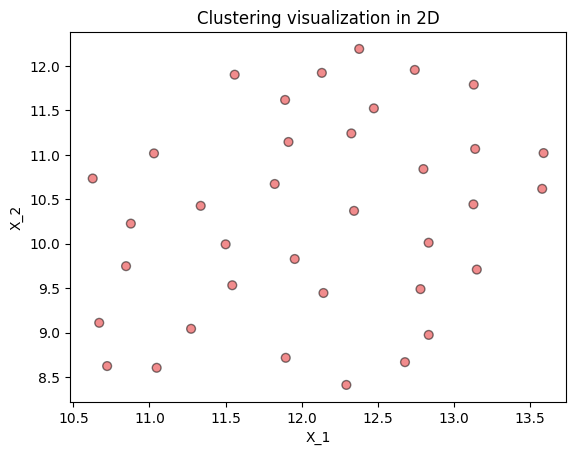

In [15]:
Visual.plot_clusters_2D(
    value_list_np=decomposed,
    label_list=text_docs,
    cluster_labels_or_centroid_ids=labels,
    title="Clustering visualization in 2D",
)